In [1]:
import warnings
warnings.simplefilter(action='ignore')

from collections import Counter
import warnings
warnings.simplefilter(action='ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve
# Load dataset
fetal_data = pd.read_csv('fetal_health.csv')
fetal_data.head()


baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                             73.0                                   0.5   
1                             17.0                                   2.1   
2                             16.0                                   2.1   
3                             16.0                                   2.4   
4                             16.0                                   2.4   

   percentage_of_time_with_abnormal_long_term_variability  ...  histogram_min  \
0                                               43.0       ...           62.0   
1                                                0.0       ...           68.0   
2                                                0.0       ...           68.0   
3                                                0.0       ...           53.0   
4                                                0.0       ...           53.0   

   histogram_max  histogram_number_of_peaks  histogram_number_of_zeroes  \
0          126.0                        2.0                         0.0   
1          198.0                        6.0                         1.0   
2          198.0                        5.0                         1.0   
3          170.0                       11.0                         0.0   
4          170.0                        9.0                         0.0   

   histogram_mode  histogram_mean  histogram_median  histogram_variance  \
0           120.0           137.0             121.0                73.0   
1           141.0           136.0             140.0                12.0   
2           141.0           135.0             138.0                13.0   
3           137.0           134.0             137.0                13.0   
4           137.0           136.0             138.0                11.0   

   histogram_tendency  fetal_health  
0                 1.0           2.0  
1                 0.0           1.0  
2                 0.0           1.0  
3                 1.0           1.0  
4                 1.0           1.0  

[5 rows x 22 columns]

In [2]:
fetal_data.shape

(2126, 22)

In [3]:
print(f"Dataset columns:\n{fetal_data.columns}")

Dataset columns:
Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')


In [4]:
fetal_data.describe().T

count        mean  \
baseline value                                      2126.0  133.303857   
accelerations                                       2126.0    0.003178   
fetal_movement                                      2126.0    0.009481   
uterine_contractions                                2126.0    0.004366   
light_decelerations                                 2126.0    0.001889   
severe_decelerations                                2126.0    0.000003   
prolongued_decelerations                            2126.0    0.000159   
abnormal_short_term_variability                     2126.0   46.990122   
mean_value_of_short_term_variability                2126.0    1.332785   
percentage_of_time_with_abnormal_long_term_vari...  2126.0    9.846660   
mean_value_of_long_term_variability                 2126.0    8.187629   
histogram_width                                     2126.0   70.445908   
histogram_min                                       2126.0   93.579492   
histogram_max                                       2126.0  164.025400   
histogram_number_of_peaks                           2126.0    4.068203   
histogram_number_of_zeroes                          2126.0    0.323612   
histogram_mode                                      2126.0  137.452023   
histogram_mean                                      2126.0  134.610536   
histogram_median                                    2126.0  138.090310   
histogram_variance                                  2126.0   18.808090   
histogram_tendency                                  2126.0    0.320320   
fetal_health                                        2126.0    1.304327   

                                                          std    min      25%  \
baseline value                                       9.840844  106.0  126.000   
accelerations                                        0.003866    0.0    0.000   
fetal_movement                                       0.046666    0.0    0.000   
uterine_contractions                                 0.002946    0.0    0.002   
light_decelerations                                  0.002960    0.0    0.000   
severe_decelerations                                 0.000057    0.0    0.000   
prolongued_decelerations                             0.000590    0.0    0.000   
abnormal_short_term_variability                     17.192814   12.0   32.000   
mean_value_of_short_term_variability                 0.883241    0.2    0.700   
percentage_of_time_with_abnormal_long_term_vari...  18.396880    0.0    0.000   
mean_value_of_long_term_variability                  5.628247    0.0    4.600   
histogram_width                                     38.955693    3.0   37.000   
histogram_min                                       29.560212   50.0   67.000   
histogram_max                                       17.944183  122.0  152.000   
histogram_number_of_peaks                            2.949386    0.0    2.000   
histogram_number_of_zeroes                           0.706059    0.0    0.000   
histogram_mode                                      16.381289   60.0  129.000   
histogram_mean                                      15.593596   73.0  125.000   
histogram_median                                    14.466589   77.0  129.000   
histogram_variance                                  28.977636    0.0    2.000   
histogram_tendency                                   0.610829   -1.0    0.000   
fetal_health                                         0.614377    1.0    1.000   

                                                        50%      75%      max  
baseline value                                      133.000  140.000  160.000  
accelerations                                         0.002    0.006    0.019  
fetal_movement                                        0.000    0.003    0.481  
uterine_contractions                                  0.004    0.007    0.015  
light_decelerations                                   0.000    0.003    0.015  
severe

In [5]:
fetal_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [6]:
print(f"Dataset size:{fetal_data.shape}")

Dataset size:(2126, 22)


In [7]:
miss_values=fetal_data.columns[fetal_data.isnull().any()]
print(f"missing values:\n {fetal_data[miss_values].isnull().sum()}")

missing values:
 Series([], dtype: float64)


In [8]:
fetal_data["fetal_health"].describe()

count    2126.000000
mean        1.304327
std         0.614377
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         3.000000
Name: fetal_health, dtype: float64

In [9]:
print(fetal_data["fetal_health"].value_counts())

fetal_health
1.0    1655
2.0     295
3.0     176
Name: count, dtype: int64


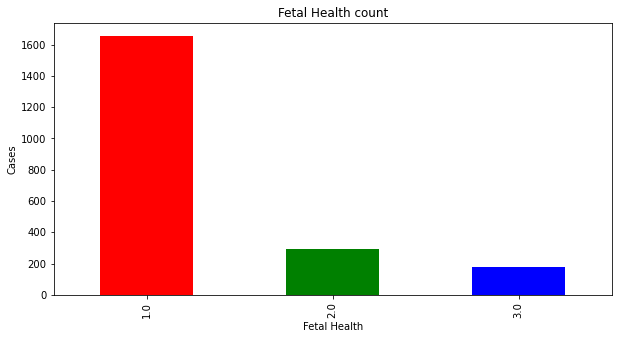

In [10]:
vis_fetal_health=fetal_data.fetal_health.value_counts().plot(figsize=(10,5),kind="bar",color=["red","green","blue"])
plt.title("Fetal Health count")
plt.xlabel("Fetal Health")
plt.ylabel("Cases")
plt.show()

<AxesSubplot:ylabel='count'>

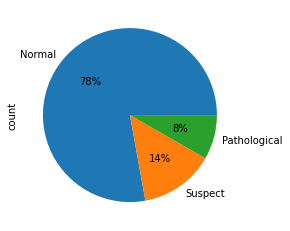

In [11]:
fetal_data.fetal_health.value_counts().plot(kind='pie',autopct="%1.0f%%" ,labels=["Normal","Suspect","Pathological"])

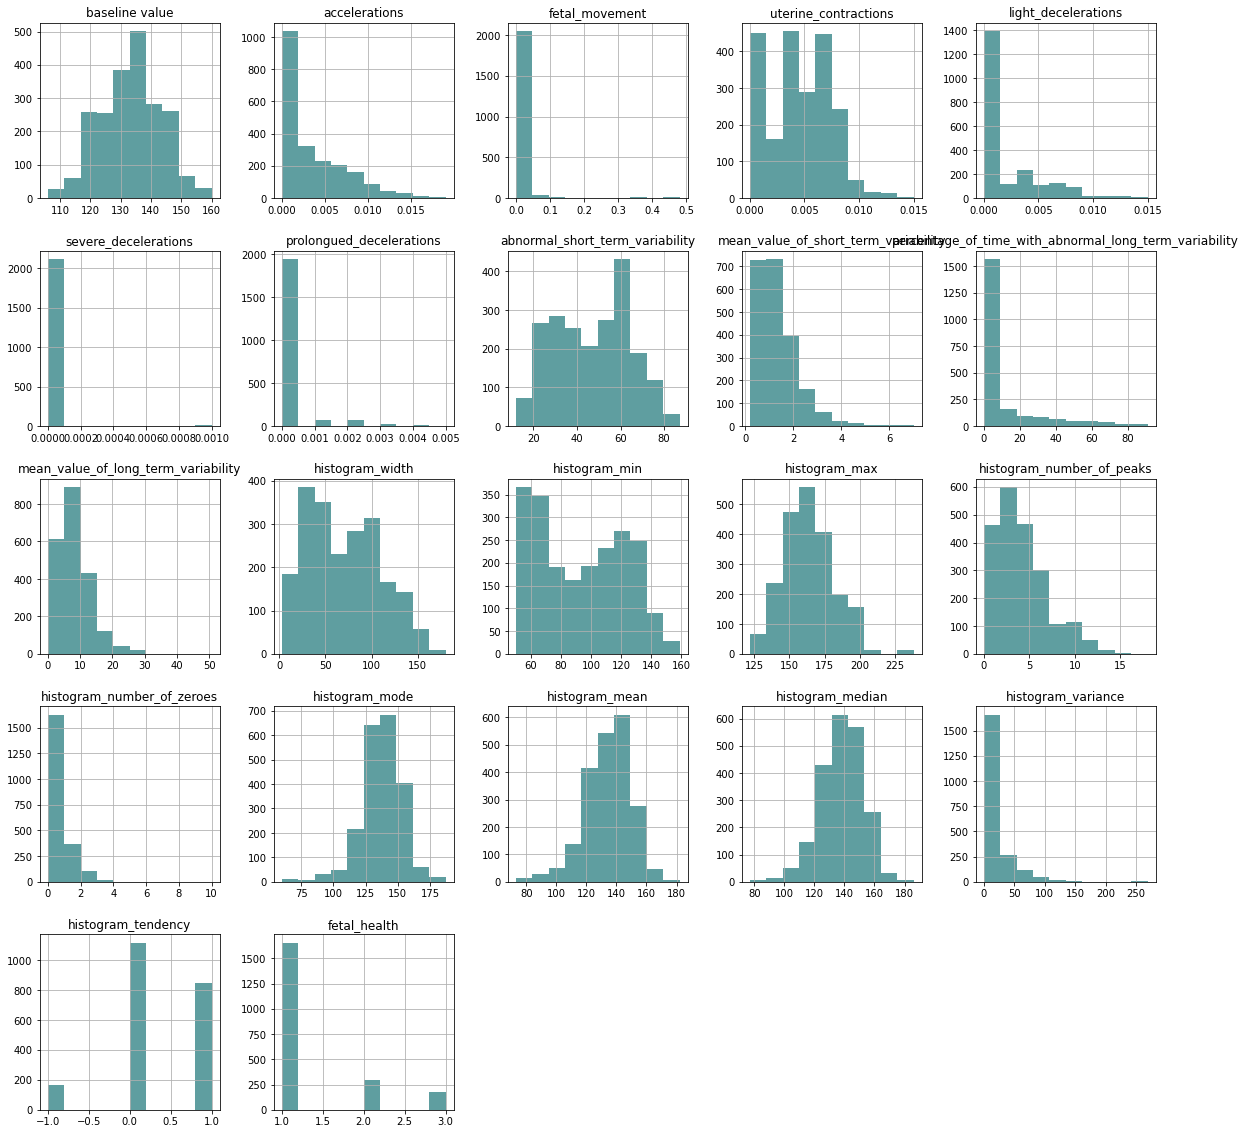

In [12]:
data_hist_plot=fetal_data.hist(figsize=(20,20),color='#5f9ea0')

In [13]:
numeric_data=fetal_data.select_dtypes(exclude="object")
corr_matrix=numeric_data.corr()
corr_matrix

baseline value  \
baseline value                                            1.000000   
accelerations                                            -0.080560   
fetal_movement                                           -0.033436   
uterine_contractions                                     -0.146373   
light_decelerations                                      -0.159032   
severe_decelerations                                     -0.053518   
prolongued_decelerations                                 -0.104597   
abnormal_short_term_variability                           0.305570   
mean_value_of_short_term_variability                     -0.279607   
percentage_of_time_with_abnormal_long_term_vari...        0.285630   
mean_value_of_long_term_variability                      -0.032091   
histogram_width                                          -0.147679   
histogram_min                                             0.361619   
histogram_max                                             0.275110   
histogram_number_of_peaks                                -0.113933   
histogram_number_of_zeroes                               -0.004745   
histogram_mode                                            0.708993   
histogram_mean                                            0.723121   
histogram_median                                          0.789246   
histogram_variance                                       -0.133938   
histogram_tendency                                        0.293503   
fetal_health                                              0.148151   

                                                    accelerations  \
baseline value                                          -0.080560   
accelerations                                            1.000000   
fetal_movement                                           0.048235   
uterine_contractions                                     0.089674   
light_decelerations                                     -0.108615   
severe_decelerations                                    -0.043018   
prolongued_decelerations                                -0.127749   
abnormal_short_term_variability                         -0.279577   
mean_value_of_short_term_variability                     0.207170   
percentage_of_time_with_abnormal_long_term_vari...      -0.373943   
mean_value_of_long_term_variability                     -0.142363   
histogram_width                                          0.298631   
histogram_min                                           -0.154286   
histogram_max                                            0.394147   
histogram_number_of_peaks                                0.190452   
histogram_number_of_zeroes                              -0.006147   
histogram_mode                                           0.243610   
histogram_mean                                           0.270334   
histogram_median                                         0.272849   
histogram_variance                                       0.125704   
histogram_tendency                                       0.028420   
fetal_health                                            -0.364066   

                                                    fetal_movement  \
baseline value                                           -0.033436   
accelerations                                             0.048235   
fetal_movement                                            1.000000   
uterine_contractions                                     -0.068779   
light_decelerations                                       0.049228   
severe_decelerations                                     -0.010976   
prolongued_decelerations                                  0.265922   
abnormal_short_term_variability                          -0.103715   
mean_value_of_short_term_variability                      0.121314   
percentage_of_time_with_abnormal_long_term_vari...       -0.074096   
mean_value_of_long_term_variability                       0.011047   
histogram_wid

<AxesSubplot:>

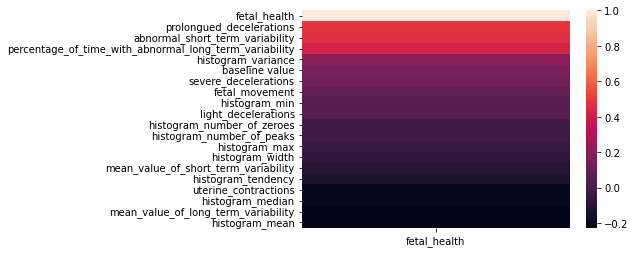

In [14]:
Num_feature=corr_matrix['fetal_health'].sort_values(ascending=False).head(20).to_frame()
cm=sns.heatmap(Num_feature)
cm

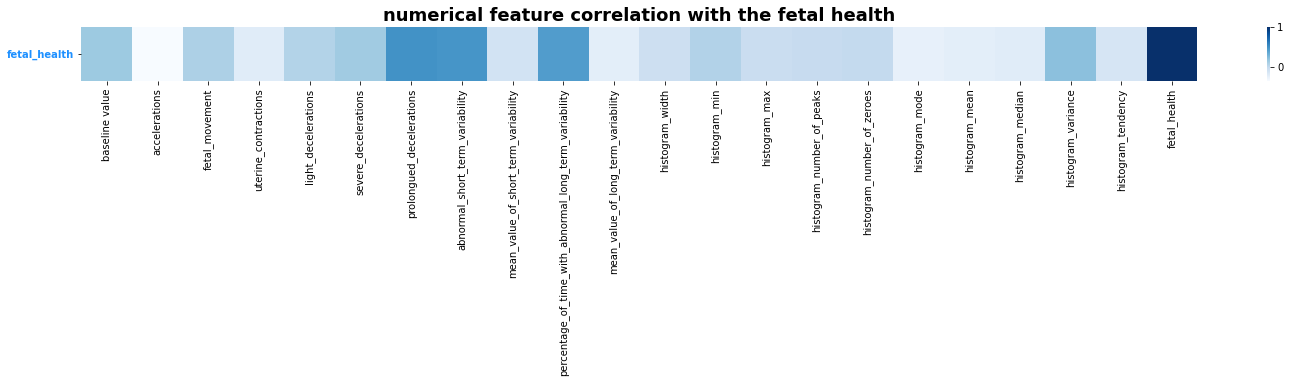

In [15]:
numeric_data=fetal_data.select_dtypes(exclude="object")
numeric_corr=numeric_data.corr()
f,ax=plt.subplots(figsize=(25,1))
sns.heatmap(numeric_corr.sort_values(by=["fetal_health"],ascending=False).head(1),cmap="Blues")
plt.title("numerical feature correlation with the fetal health",weight="bold",fontsize=18)

plt.yticks(weight="bold",color="dodgerblue",rotation=0)
plt.show()


In [16]:
Num_feature=numeric_corr["fetal_health"].sort_values(ascending=False).head(20).to_frame()
Num_feature

fetal_health
fetal_health                                            1.000000
prolongued_decelerations                                0.484859
abnormal_short_term_variability                         0.471191
percentage_of_time_with_abnormal_long_term_vari...      0.426146
histogram_variance                                      0.206630
baseline value                                          0.148151
severe_decelerations                                    0.131934
fetal_movement                                          0.088010
histogram_min                                           0.063175
light_decelerations                                     0.058870
histogram_number_of_zeroes                             -0.016682
histogram_number_of_peaks                              -0.023666
histogram_max                                          -0.045265
histogram_width                                        -0.068789
mean_value_of_short_term_variability                   -0.103382
histogram_tendency                                     -0.131976
uterine_contractions                                   -0.204894
histogram_median                                       -0.205033
mean_value_of_long_term_variability                    -0.226797
histogram_mean                                         -0.226985

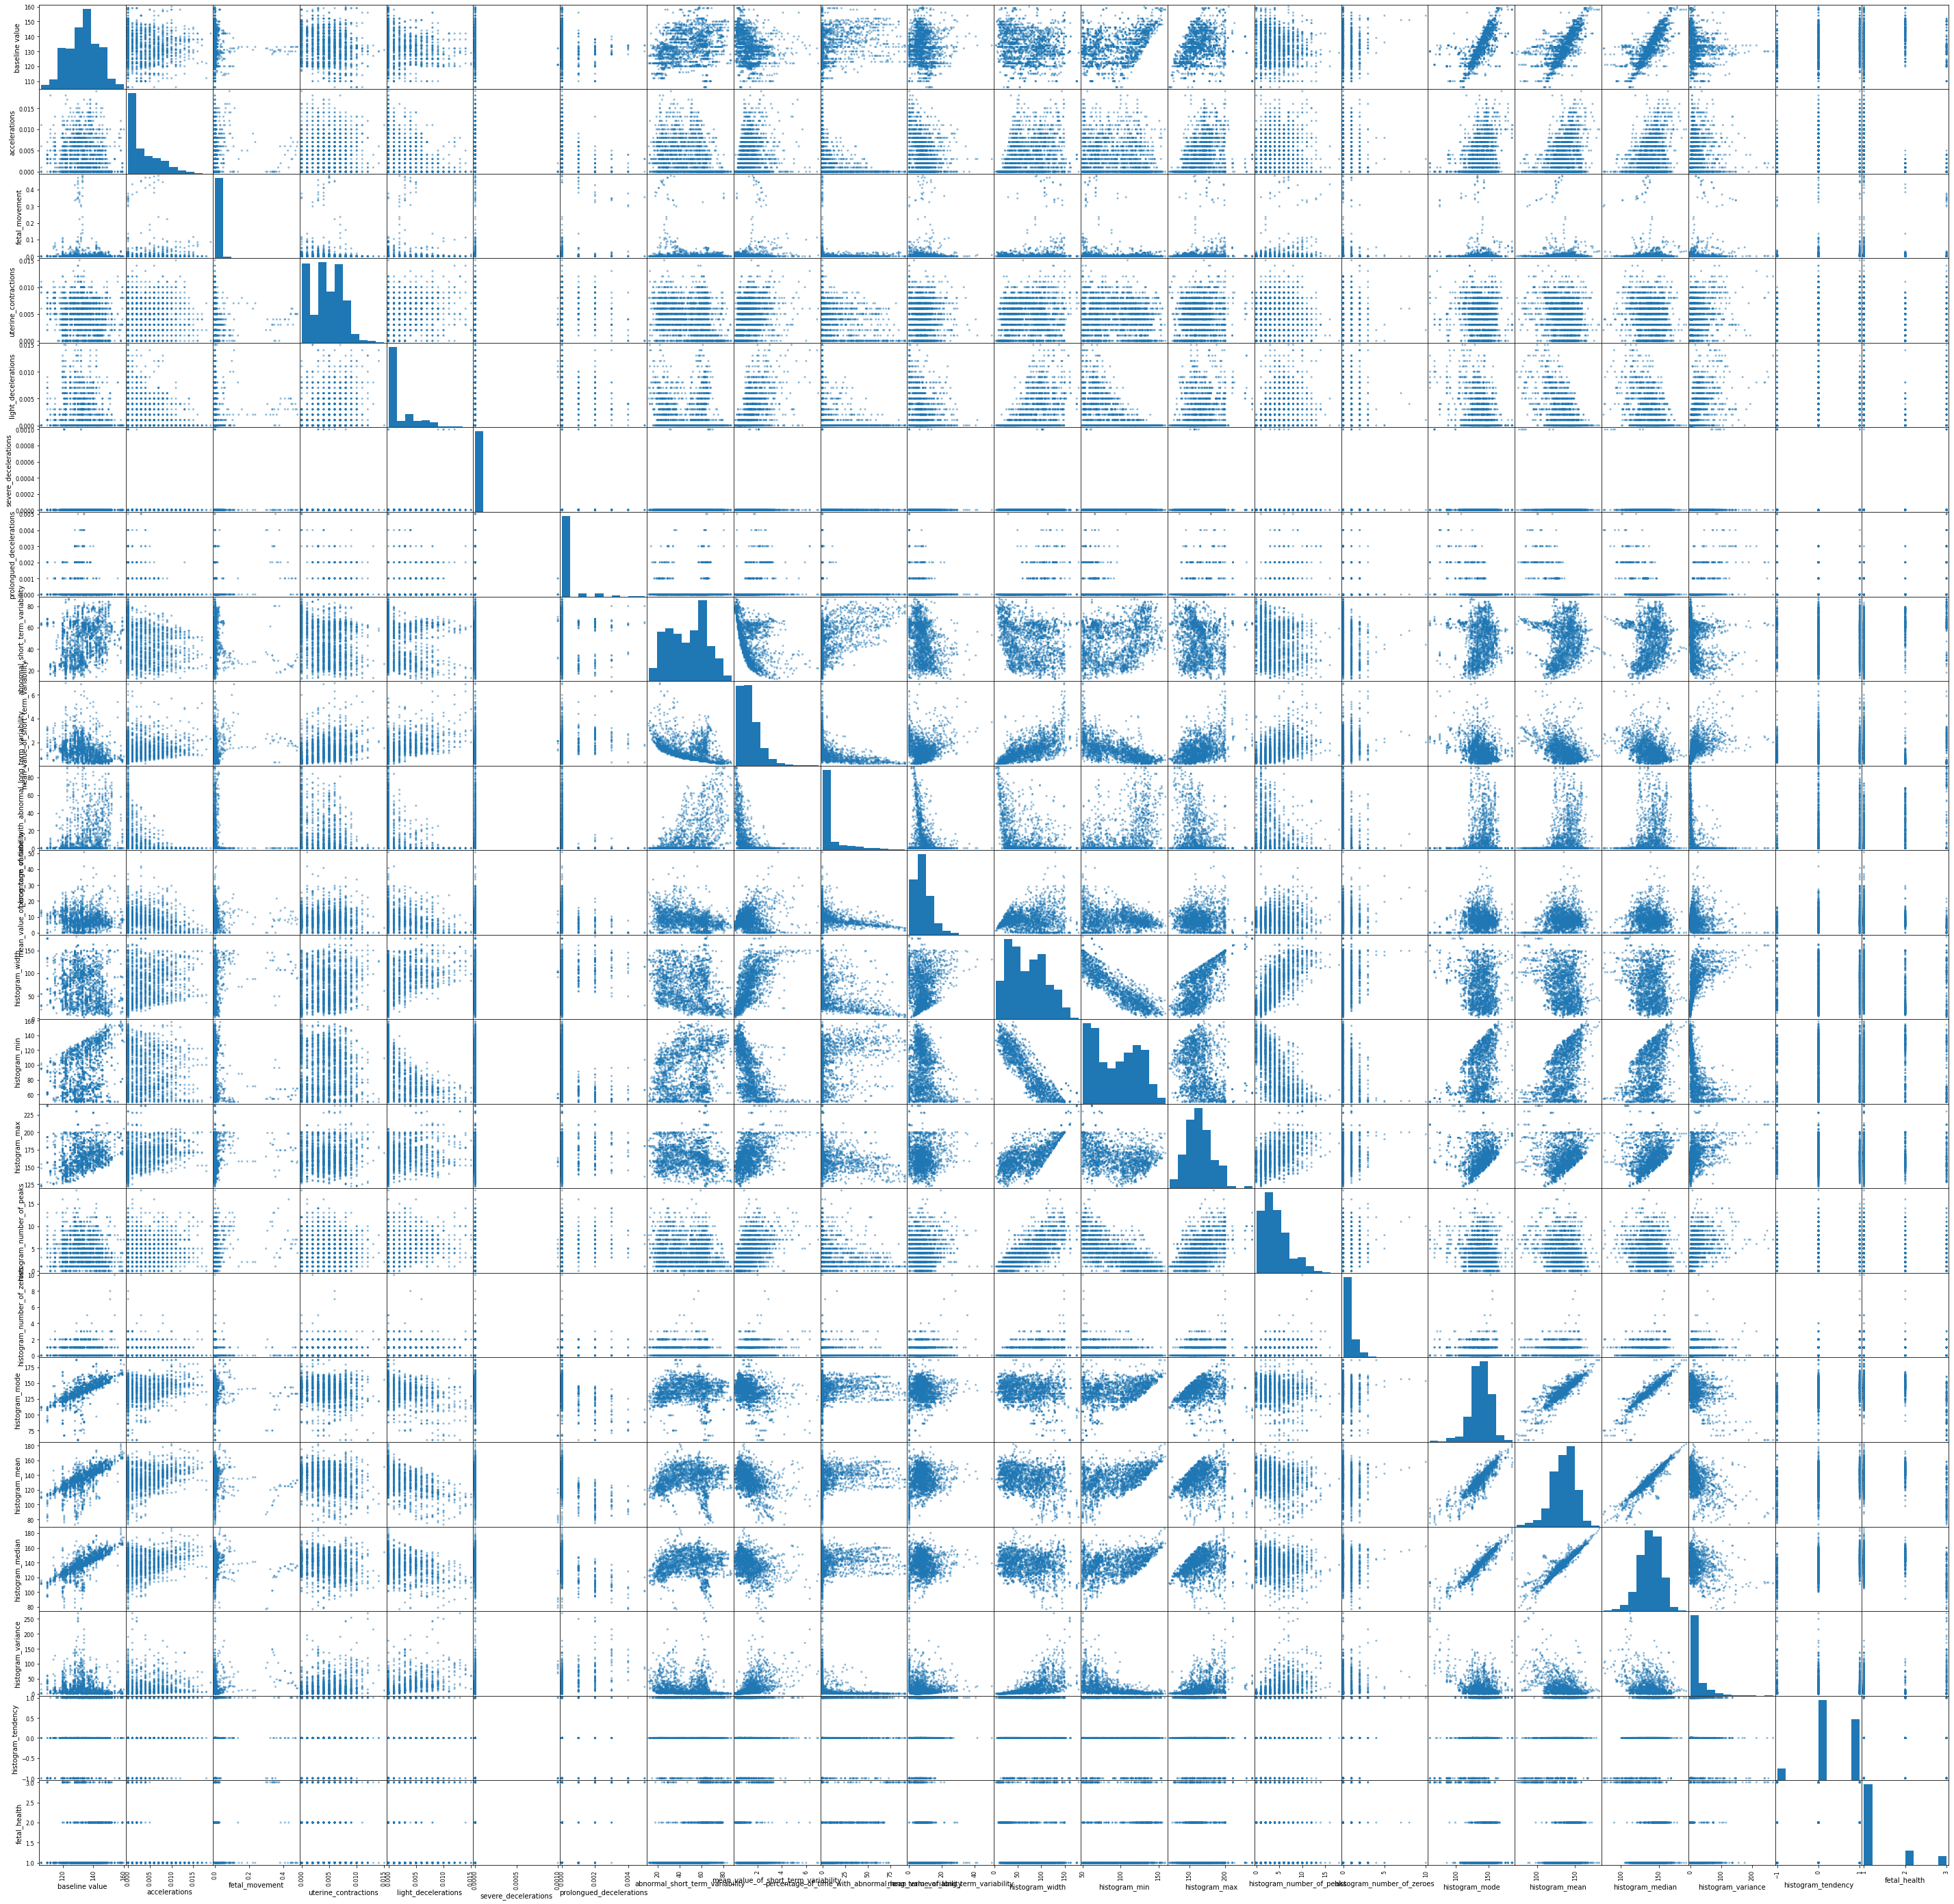

In [17]:
from pandas.plotting import scatter_matrix
scatterMatrix=scatter_matrix(fetal_data,figsize=(50,50))

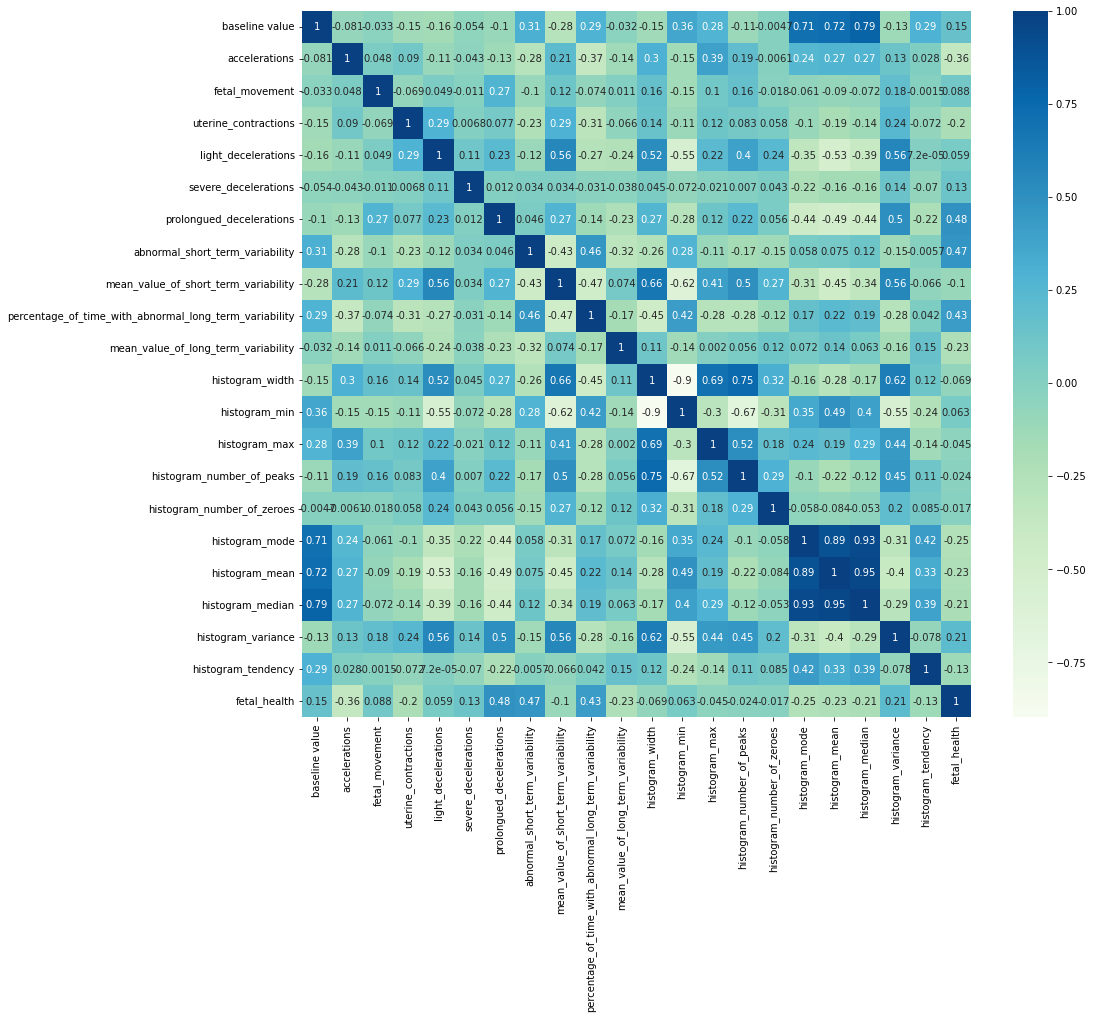

In [18]:
plt.figure(figsize=(15,13))
p=sns.heatmap(corr_matrix,annot=True,cmap='GnBu')

In [19]:
columns=['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency']

scale_X = StandardScaler()

X = pd.DataFrame(
    scale_X.fit_transform(fetal_data.drop(["fetal_health"], axis=1)),
    columns=columns
)

In [20]:
X.head()

baseline value  accelerations  fetal_movement  uterine_contractions  \
0       -1.352220      -0.822388        -0.20321             -1.482465   
1       -0.132526       0.730133        -0.20321              0.554627   
2       -0.030884      -0.046128        -0.20321              1.233657   
3        0.070757      -0.046128        -0.20321              1.233657   
4       -0.132526       0.988886        -0.20321              1.233657   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0            -0.638438             -0.057476                 -0.268754   
1             0.375243             -0.057476                 -0.268754   
2             0.375243             -0.057476                 -0.268754   
3             0.375243             -0.057476                 -0.268754   
4            -0.638438             -0.057476                 -0.268754   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                         1.513190                             -0.943095   
1                        -1.744751                              0.868841   
2                        -1.802928                              0.868841   
3                        -1.802928                              1.208579   
4                        -1.802928                              1.208579   

   percentage_of_time_with_abnormal_long_term_variability  ...  \
0                                           1.802542       ...   
1                                          -0.535361       ...   
2                                          -0.535361       ...   
3                                          -0.535361       ...   
4                                          -0.535361       ...   

   histogram_width  histogram_min  histogram_max  histogram_number_of_peaks  \
0        -0.165507      -1.068562      -2.119592                  -0.701397   
1         1.529124      -0.865539       1.893794                   0.655137   
2         1.529124      -0.865539       1.893794                   0.316003   
3         1.195333      -1.373097       0.333033                   2.350804   
4         1.195333      -1.373097       0.333033                   1.672537   

   histogram_number_of_zeroes  histogram_mode  histogram_mean  \
0                   -0.458444       -1.065614        0.153270   
1                    0.958201        0.216638        0.089126   
2                    0.958201        0.216638        0.024982   
3                   -0.458444       -0.027600       -0.039162   
4                   -0.458444       -0.027600        0.089126   

   histogram_median  histogram_variance  histogram_tendency  
0         -1.181642            1.870569            1.112980  
1          0.132038           -0.234998           -0.524526  
2         -0.006244           -0.200481           -0.524526  
3         -0.075385           -0.200481            1.112980  
4         -0.006244           -0.269516            1.112980  

[5 rows x 21 columns]

In [21]:
y=fetal_data["fetal_health"]

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

In [23]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1488, 21), (638, 21), (1488,), (638,))

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [25]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [26]:
log_reg_model=LogisticRegression()


In [27]:
log_reg_model.fit(X_train,y_train)

LogisticRegression()

In [28]:
y_pred_lr=log_reg_model.predict(X_test)

In [29]:
accuracy=accuracy_score(y_test,y_pred_lr)*100
print(f"Accuracy of the Logistic Regression Model={round(accuracy,2)} %")

Accuracy of the Logistic Regression Model=89.34 %


In [30]:
from sklearn.model_selection import cross_val_score,StratifiedKFold


In [31]:
cv_method=StratifiedKFold(n_splits=3)

In [32]:
cv_score = cross_val_score(
    log_reg_model,
    X_train,
    y_train,
    cv=cv_method,
    n_jobs=2,
    scoring="accuracy"
)

print(f"Scores (cross-validate) for logistic regression model:\n{cv_score}")
print(f"CrossValMeans: {round(cv_score.mean(), 3) * 100}%")
print(f"CrossValStandardDeviation: {round(cv_score.std(), 3) }")


Scores (cross-validate) for logistic regression model:
[0.90927419 0.89717742 0.88306452]
CrossValMeans: 89.7%
CrossValStandardDeviation: 0.011


In [33]:
#hyper parameter tunning
params_LR={"tol":[0.0001,0.0002,0.0003],
           "C":[0.01,0.1,1,10,100],
          "intercept_scaling":[1,2,3,4]
}

In [34]:
GridSearchCV_LR=GridSearchCV(estimator=log_reg_model,
                             param_grid=params_LR,
                             cv=cv_method,
                             verbose=1,
                             n_jobs=2,
                             scoring='accuracy',
                             return_train_score=True
                             )

In [35]:
GridSearchCV_LR.fit(X_train,y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=2,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'intercept_scaling': [1, 2, 3, 4],
                         'tol': [0.0001, 0.0002, 0.0003]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [36]:
best_estimator_LR=GridSearchCV_LR.best_estimator_
print(f"Best estimator for LR is {best_estimator_LR}")

Best estimator for LR is LogisticRegression(C=10, tol=0.0002)


In [37]:
best_params_LR=GridSearchCV_LR.best_params_
print(f"Best parameters for Logistic Regression: {best_params_LR}")

Best parameters for Logistic Regression: {'C': 10, 'intercept_scaling': 1, 'tol': 0.0002}


In [38]:
print(f"Best score for LR model:{round(GridSearchCV_LR.best_score_,3)*100}%")

Best score for LR model:90.10000000000001%


In [39]:
print("classification report")
print(classification_report(y_test,y_pred_lr))

classification report
              precision    recall  f1-score   support

         1.0       0.94      0.95      0.94       497
         2.0       0.62      0.72      0.67        88
         3.0       0.95      0.70      0.80        53

    accuracy                           0.89       638
   macro avg       0.84      0.79      0.81       638
weighted avg       0.90      0.89      0.89       638



In [40]:
print("confusion matrix:")
print(confusion_matrix(y_test,y_pred_lr))



confusion matrix:
[[470  26   1]
 [ 24  63   1]
 [  4  12  37]]


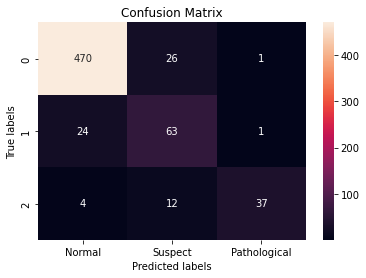

In [41]:
ax=plt.subplot()
cf=confusion_matrix(y_test,y_pred_lr)
sns.heatmap(cf,annot=True,fmt='0.3g')
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Normal','Suspect','Pathological']);


In [42]:
#knearest neighborrs
knn=KNeighborsClassifier()
knn_mod=knn.fit(X_train,y_train)
print(f'baseline K-nearest neighborrs accuracy score:{round(knn_mod.score(X_test,y_test),3)*100}%')
pred_knn=knn_mod.predict(X_test)

baseline K-nearest neighborrs accuracy score:87.6%


In [43]:
cv_method=StratifiedKFold(n_splits=3)
scores_knn=cross_val_score(knn,X_train,y_train,cv=cv_method,n_jobs=2,scoring='accuracy')

print(f"Scores (cross-validate) for KNN model:\n{scores_knn}")
print(f"CrossValMeans: {round(scores_knn.mean(), 3) * 100}%")
print(f"CrossValStandardDeviation: {round(scores_knn.std(), 3) }")

Scores (cross-validate) for KNN model:
[0.90927419 0.89717742 0.89717742]
CrossValMeans: 90.10000000000001%
CrossValStandardDeviation: 0.006


In [44]:
param_knn={"leaf_size":list(range(1,30)),
           "n_neighbors":list(range(1,21)),
           "p":[1,2]

}

In [45]:
GridSearchCV_knn=GridSearchCV(estimator=KNeighborsClassifier(),param_grid=param_knn,cv=cv_method,scoring='accuracy',
                              
                              verbose=1,
                              n_jobs=1,
                              return_train_score=True)

In [ ]:
GridSearchCV_knn.fit(X_train, y_train)

Fitting 3 folds for each of 1160 candidates, totalling 3480 fits


In [ ]:
best_estimator_knn=GridSearchCV_knn.best_estimator_
print(f"best estimator for knn  is {best_estimator_knn}")

In [ ]:
best_params_knn=GridSearchCV_knn.best_params_
print(f"best param values for knn:{best_params_knn}")

In [ ]:
best_score_kn=GridSearchCV_knn.best_score_
print(f"best score for GNB model:{round(best_score_kn,3)*100}%")

In [ ]:
print("classification report")
print(classification_report(y_test,pred_knn))

In [ ]:
print("confusion matrix:")
print(confusion_matrix(y_test,pred_knn))

In [ ]:
ax=plt.subplot()
cf=confusion_matrix(y_test,pred_knn)
sns.heatmap(cf,annot=True,fmt='0.3g')
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Normal','Suspect','Pathological']);

In [ ]:
#Random forest
random_forest = RandomForestClassifier()
random_forest_mod=random_forest.fit(X_train, y_train)
print(f"Baseline Random Forest:{round(random_forest_mod.score(X_test, y_test), 3)*100}%"
      )
pred_random_forest = random_forest_mod.predict(X_test)

In [ ]:
#cross validation
scores_RF=cross_val_score(random_forest,X_train,y_train,cv=cv_method,n_jobs=2,scoring='accuracy')
print(f"Scores (cross-validate) for KNN model:\n{scores_RF}")
print(f"CrossValMeans: {round(scores_RF.mean(), 3) * 100}%")
print(f"CrossValStandardDeviation: {round(scores_RF.std(), 3) }")

In [ ]:
params_RF={"min_samples_split":[2,6,20],
           "min_samples_leaf":[1,4,16],
           "n_estimators":[100,200,300,400],
           "criterion":["gini"]

}

In [ ]:
#fit model
GridSearchCV_RF=GridSearchCV(estimator=RandomForestClassifier(),param_grid=params_RF,cv=cv_method,
                             verbose=1,n_jobs=2,scoring='accuracy',return_train_score=True)

In [ ]:
GridSearchCV_RF.fit(X_train, y_train)

In [ ]:
best_estimator_RF=GridSearchCV_RF.best_estimator_
print(f"best estimator for RF model  is {best_estimator_RF}")

In [ ]:
best_params_RF=GridSearchCV_RF.best_params_
print(f"best PARAMS for RF model  is {best_params_RF}")

In [ ]:
best_score__RF=GridSearchCV_RF.best_score_
print(f"best score for RF model  is {round(best_score__RF,3)}")

In [ ]:
print("classification report")
print(classification_report(y_test,pred_random_forest))

In [ ]:
print("confusion matrix:")
print(confusion_matrix(y_test,pred_random_forest))

In [ ]:
ax=plt.subplot()
cf=confusion_matrix(y_test,pred_random_forest)
sns.heatmap(cf,annot=True,ax=ax,fmt='0.3g',cmap='BuGn')
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Normal','Suspect','Pathological']);

In [ ]:

# Instantiate and train Decision Tree
decision_tree = DecisionTreeClassifier()

In [ ]:
decision_tree_mod = decision_tree.fit(X_train, y_train)


In [ ]:
# Baseline score
print(f"Baseline Decision Tree: {round(decision_tree_mod.score(X_test, y_test), 3) * 100}%")


In [ ]:
# Prediction
pred_decision_tree = decision_tree_mod.predict(X_test)

In [ ]:
# Cross-validation
scores_DT = cross_val_score(decision_tree, X_train, y_train, cv=cv_method, n_jobs=2, scoring='accuracy')
print(f"Scores (cross-validate) for Decision Tree model:\n{scores_DT}")
print(f"CrossValMeans: {round(scores_DT.mean(), 3) * 100}%")
print(f"CrossValStandardDeviation: {round(scores_DT.std(), 3)}")


In [ ]:
# Hyperparameter tuning
params_DT = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 10, 20],
    "min_samples_leaf": [1, 5, 10]
}


In [ ]:
GridSearchCV_DT = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=params_DT,
    cv=cv_method,
    verbose=1,
    n_jobs=2,
    scoring='accuracy',
    return_train_score=True
)

In [ ]:
GridSearchCV_DT.fit(X_train, y_train)


In [ ]:
# Best estimator, params, and score
best_estimator_DT = GridSearchCV_DT.best_estimator_
print(f"Best estimator for Decision Tree model is: {best_estimator_DT}")

In [ ]:
best_params_DT = GridSearchCV_DT.best_params_
print(f"Best PARAMS for Decision Tree model is: {best_params_DT}")


In [ ]:
best_score_DT = GridSearchCV_DT.best_score_
print(f"Best score for Decision Tree model is: {round(best_score_DT, 3)}")


In [ ]:
# Classification report and confusion matrix
print("Classification report:")
print(classification_report(y_test, pred_decision_tree))


In [ ]:

# Confusion Matrix
cf = confusion_matrix(y_test, pred_decision_tree)

# ✅ 1. Plain printed matrix (array style)
print("Confusion matrix:")
print(cf)  # This shows as: [[485   9   3], ...]

In [ ]:
ax = plt.subplot()
sns.heatmap(cf, annot=True, ax=ax, fmt='0.3g', cmap='YlGnBu')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - Decision Tree')
ax.xaxis.set_ticklabels(['Normal', 'Suspect', 'Pathological'])

plt.show()

In [ ]:
#MODEL SELECTION
results=pd.DataFrame({
    'Model':['Logistic Regression','Decision Tree','Random Forest','KNN'],
    'Score':[log_reg_model.score(X_test,y_test)*100,
             knn_mod.score(X_test,y_test)*100,
             random_forest_mod.score(X_test,y_test)*100,
             decision_tree_mod.score(X_test,y_test)*100
             ]
})
result_df=results.sort_values(by='Score',ascending=False)
result_df=result_df.set_index('Score')
result_df.head(5)

In [ ]:
## Sort by score
result_df = results.sort_values(by='Score', ascending=False)

# Plotting
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 5))
ax = sns.barplot(x="Score", y="Model", data=result_df, palette="viridis")

# Add value labels on bars
for index, value in enumerate(result_df["Score"]):
    ax.text(value + 0.5, index, f"{value:.2f}%", color='black', va='center')

plt.title("Model Comparison by Accuracy")
plt.xlabel("Accuracy (%)")
plt.ylabel("Models")
plt.xlim(0, 110)
plt.tight_layout()
plt.show()

In [ ]:
import pickle

# Save the model to the 'flask' subfolder inside 'fetal_health folder'
pickle.dump(random_forest_mod, open('fetal_health folder/flask/fetal_health.pkl', 'wb'))
